,bucket,cpu,gcl,bucket %,gcl delta
count,1135.000000,1135.000000,1.135000e+03,1135.000000,1134.000000
mean,9911.021145,12.411295,6.954457e+06,99.110211,2.216931
std,192.702203,33.966842,8.382313e+02,1.927022,57.786018
min,9128.000000,1.924423,6.952743e+06,91.280000,-11.000000
25%,9826.000000,3.076305,6.953788e+06,98.260000,-5.000000
50%,10000.000000,4.825936,6.954676e+06,100.000000,-1.000000
75%,10000.000000,6.437881,6.955288e+06,100.000000,0.000000
max,11000.000000,213.437470,6.955288e+06,110.000000,1005.000000


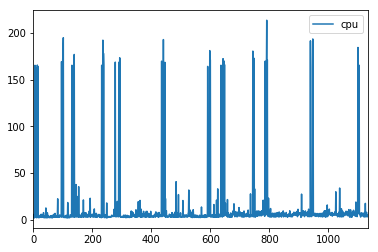

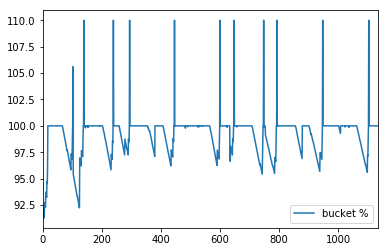

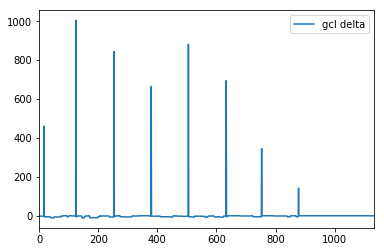

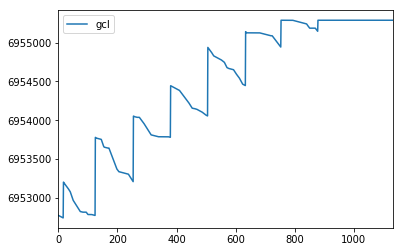

In [3]:
import fetch_stats as fs
import pandas as pd
import matplotlib.pyplot as plt

reports = fs.main()
reports = [
    {
        **x,
        'gcl': x['gcl']['progress']
    }
    for x in reports
]
df = pd.DataFrame(reports)
df['bucket %'] = df['bucket'] / 100
df['gcl delta'] = df['gcl'].diff().shift(-1)
df.plot(y="cpu")
df.plot(y="bucket %")
df.plot(y="gcl delta")
df.plot(y="gcl")
df.describe()